In [1]:
#mount google colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
from keras.utils import np_utils
import sys
import os
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Conv2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras import regularizers
from sklearn.utils import shuffle

In [ ]:
#loading the save numpy arrays in the previous code
import numpy as np

data=np.load('drive/MyDrive/dataset/data.npy')
label=np.load('drive/MyDrive/dataset/label.npy')
target=np.load('drive/MyDrive/dataset/target.npy')

In [ ]:
data = pd.read_csv('drive/MyDrive/dataset/file_name_(640lama).csv', sep='\t',encoding='unicode_escape')

In [ ]:
data = shuffle(data)
data.head()

Unnamed: 0         0         1  ...      9215  label      file
400         400  0.002430  0.002445  ...  0.002676      3  pa88.png
577         577  0.003399  0.003245  ...  0.000384      5  wh42.jpg
51           51  0.002015  0.002122  ...  0.002291      0  bh46.jpg
273         273  0.003737  0.003737  ...  0.003737      2  nd71.JPG
250         250  0.002122  0.001968  ...  0.003106      2  nd50.JPG

[5 rows x 9219 columns]

In [ ]:
nm = ['pa107.png', 'pus82.png', 'pa15.png', 'bh32.jpg', 'pa43.jpg', 'nd25.png', 'cy47.png','wh99.png', 'pa85.png', 
      'pa73.png', 'nd69.JPG', 'bh53.jfif', 'pus26.png', 'pus32.png', 'pus66.png', 'wh1.png', 'nd68.JPG', 
      'nd53.JPG', 'cy6.png', 'pa10.png', 'wh16.jpg','pa78.png', 'nd56.JPG', 'pus21.png', 'pus45.png', 'pa9.jpg', 
      'cy98.jpg', 'p1.jpg', 'pus30.png', 'pa56.JPG', 'pa54.JPG', 'cy81.png', 'pus17.png', 'pa112.png', 'wh82.jpg',
      'wh64.jpg', 'pa51.JPG', 'cy51.png', 'bh71.jpg', 'pa42.JPG', 'bh66.jpg', 'nd95.png', 'bh21.png', 'pa88.png', 
      'bh58.png', 'wh97.jpg', 'wh26.png','pa60.JPG', 'nd77.JPG', 'wh19.png', 'pus89.png', 'pa114.png', 'pa115.png',
      'pa70.JPG', 'bh49.jpg', 'bh37.jpg', 'pa109.png', 'pa20.JPG', 'pa97.png', 'p59.JPG', 'pus31.jpg', 'pus10.png',
      'pa17.JPG', 'cy69.jpg', 'pus116.png', 'pus112.png', 'nd34.png', 'pus83.png', 'cy7.png','wh22.png', 'cy70.jpg',
      'pa47.JPG', 'pa46.JPG', 'pus38.png', 'nd16.png', 'nd15.png', 'pus69.png', 'pus57.png', 'bh99.jpg', 'wh4.png', 
      'cy39.png', 'pus77.png', 'cy37.png', 'nd38.png', 'cy57.png', 'pa86.png', 'pa108.png', 'pa74.png', 'cy49.png',    
      'pa53.png', 'wh30.png', 'wh33.jpg', 'pus41.png', 'pus68.png', 'wh57.png', 'cy50.png', 'cy45.png', 'pa116.png', 
      'wh7.png', 'pus58.png', 'cy41.png', 'wh61.jpg', 'pa80.png', 'pa104.png', 'bh5.png','cy14.png', 'wh96.png', 'pus28.png',
      'cy95.png', 'nd26.png', 'pus70.png','bh90.png', 'cy65.png', 'pa38.jpg', 'nd11.png', 'pa16.png', 'bh76.png', 'nd78.JPG',
      'bh40.jpg']
a = []
for i in range(len(data)):
  for j in range(len(nm)):
    if (data['file'][i] == nm [j]):
      a.append(i)
print(len(a))
data = data.drop(a)

61


In [ ]:
xx = data.drop(columns=['label','file'],axis = 1)
y = data['label'].values
name = data['file'].values


AttributeError: ignored

In [ ]:
xx = xx.drop("Unnamed: 0",axis=1)


In [ ]:
len(xx)

640

In [ ]:
data.shape

(640, 9219)

In [ ]:
x = xx.to_numpy()
x= x.reshape(len(xx),96,96,1)
label = np_utils.to_categorical(y)


In [ ]:
# Split Data
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=999,shuffle=True)
print("Train data = " + str(len(train_data)))
print("Test data = " + str(len(test_data)))

Train data = 512
Test data = 128


In [ ]:
len(data)

640

In [ ]:
# Data Augmentation
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2
                             )

training_generator = datagen.flow(train_data, train_target, batch_size =32, subset='training',shuffle=True)

validation_generator = datagen.flow(train_data, train_target,batch_size =32, subset='validation')

print(training_generator.n)
print(validation_generator.n)

410
102


In [ ]:
import tensorflow as tf
input_shape=(96, 96, 1)
def tf_data_generator(generator, input_shape):
    # num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, 6])
    )
    return tf_generator
tf_train_data = tf_data_generator(training_generator, input_shape)
# testing_data = tf_data_generator(test_generator, input_shape)
tf_val_data = tf_data_generator(validation_generator, input_shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

model=Sequential()

model.add(Conv2D(16,(3,3),padding='same',input_shape=data.shape[1:],trainable=True))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The 1st CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The 2nd convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The 3rd convolution layer followed by Relu and MaxPooling layers

# model.add(Conv2D(256,(5,5),padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# # The 4th convolution layer followed by Relu and MaxPooling layers
 
model.add(Flatten())
model.add(Dropout(0.2))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(1664,activation= 'relu'))
model.add(Dropout(0.8))
model.add(Dense(128,activation= 'relu'))
model.add(Dense(6,activation='softmax'))
#The Final layer with two outputs for two categories

# optimizers.RMSprop(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.000),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(16,(3,3), padding ="same", input_shape=(96, 96, 1), trainable=True))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), padding ="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), padding ="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024,activation="relu"))
# model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              # optimizer=optimizers.RMSprop(learning_rate=0.0001),
              optimizer= 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models, Model, optimizers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
fine_tune =2
if fine_tune > 0:
    for layer in vgg_model.layers[:-fine_tune]:
        layer.trainable = False
else:
    for layer in vgg_model.layers:
        layer.trainable = False
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
# x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
x = Dense(6, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
from keras.callbacks import ReduceLROnPlateau
# lr_reduce = ReduceLROnPlateau(monitor='val_accuracy',patience=10, verbose=1, mode='min')
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')
checkpoint = ModelCheckpoint('vgg16_finetune.h5', monitor= 'val_accuracy', save_best_only = True, verbose= 1)

#Compile model
from keras.optimizers import Adam
opm = Adam(learning_rate=0.001)
transfer_model.compile(loss="categorical_crossentropy", optimizer=opm, metrics=["accuracy"])
#Fit model
history = transfer_model.fit_generator(training_generator,   
                            steps_per_epoch=len(training_generator),
                            epochs=100,
                            validation_data=validation_generator,
                            validation_steps=len(validation_generator),
                            shuffle=True,
                            callbacks=[checkpoint, early_stop],
                            verbose=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The 1st CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The 2nd convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(256,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The 3rd convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(896,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# # The 4th convolution layer followed by Relu and MaxPooling layers
 
model.add(Flatten())
model.add(Dropout(0.2))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(1664,activation= 'relu'))
model.add(Dropout(0.8))
model.add(Dense(192,activation= 'relu'))
model.add(Dense(6,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 256)      

In [ ]:
print(len(training_generator))

31


In [ ]:
from tensorflow import keras
import tensorboard

tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./Graph')

In [ ]:
# fit the model

es = EarlyStopping(monitor='val_accuracy', patience=5)
cp = ModelCheckpoint('drive/MyDrive/dataset/best_model_77.h5', monitor='val_accuracy',verbose=1, save_best_only=True)
history=model.fit(tf_train_data,steps_per_epoch=len(training_generator), epochs=150, callbacks=[cp,tensorboard_callback], validation_data=tf_val_data,validation_steps=len(validation_generator),shuffle=True,verbose=1)
# history=model.fit(training_generator, epochs=100, batch_size=32, callbacks=[es,cp], validation_data=validation_generator,verbose=1)

Epoch 1/150
12/13 [==========================>...] - ETA: 0s - loss: 1.8380 - accuracy: 0.1510

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models, Model, optimizers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

for layer in vgg_model.layers[:15]:
  layer.trainable = False
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)
for i, layer in enumerate(transfer_model.layers):
  print(i, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten_4 True
20 dense_3 True
21 dropout_1 True
22 dense_4 True
23 dense_5 True


In [ ]:
#Compile model
transfer_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
#Fit model
history = transfer_model.fit_generator(train_generator, validation_data=(X_test,y_test), epochs=100, shuffle=True, callbacks=[lr_reduce],verbose=1)

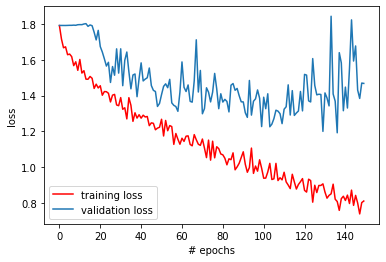

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')

plt.legend()
plt.show()

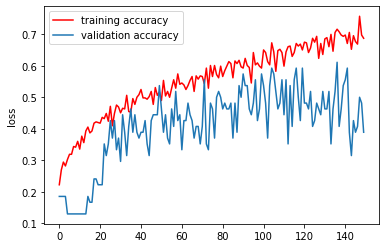

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
# plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_load = load_model('drive/MyDrive/best_model_coba1.h5')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/file_name_uji601(106).csv', sep='\t',encoding='unicode_escape')

In [ ]:
xx = data.drop(columns=['label','file'],axis = 1)
y = data['label'].values
name = data['file'].values
xx = xx.drop("Unnamed: 0",axis=1)

In [ ]:
x = xx.to_numpy()
x= x.reshape(len(xx),96,96,1)
label = np_utils.to_categorical(y)


In [ ]:
# evaluating CNN Model
score = model.evaluate(x,label, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 84ms/step - loss: 3685.8523 - accuracy: 0.2170
Test Loss: 3685.852294921875
Test accuracy: 0.21698112785816193


In [ ]:
print(test_data[:100])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     nodules       1.00      0.28      0.43        18
     papules       0.00      0.00      0.00        15
    pustules       0.00      0.00      0.00        17
      cystic       0.15      1.00      0.26        15
  blackheads       0.00      0.00      0.00        24
  whiteheads       0.00      0.00      0.00        17

    accuracy                           0.19       106
   macro avg       0.19      0.21      0.12       106
weighted avg       0.19      0.19      0.11       106



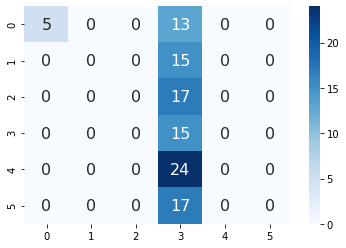

In [ ]:
# Classification Report and Confusion Matrix:

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns

Y_pred = model_load.predict(x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['nodules','papules','pustules','cystic','blackheads','whiteheads']
                                               
print(classification_report(np.argmax(label,axis=1), y_pred,target_names=target_names))

cf_matrix = confusion_matrix(np.argmax(label,axis=1), y_pred, labels=[0,1,2,3,4,5])
sns.heatmap(cf_matrix, cmap='Blues', annot=True, annot_kws={"size": 16}, fmt="d")

In [ ]:
y_pred

array([0, 5, 3, 1, 3, 2, 1, 2, 3, 1, 4, 3, 0, 4, 4, 3, 1, 3, 5, 4, 4, 5,
       4, 0, 1, 1, 3, 4, 2, 1, 4, 0, 2, 4, 1, 2, 3, 0, 4, 3, 3, 5, 2, 2,
       2, 0, 3, 4, 4, 4, 3, 0, 3, 2, 5, 0, 5, 1, 4, 4, 2, 0, 4, 4, 5, 3,
       5, 3, 2, 2, 5, 1, 2, 0, 2, 4, 2, 4, 3, 4, 0, 1, 2, 1, 2, 3, 2, 5,
       1, 5, 5, 0, 5, 0, 3, 3, 0, 0, 3, 2, 5, 1, 3, 5, 1, 2, 0, 1, 1, 0,
       2, 0, 5, 1, 5, 0, 0, 0, 1, 4, 0, 3, 5, 0, 0, 1, 4, 0, 5, 2, 0, 4,
       3, 4, 2, 4, 0, 2, 4, 0, 2, 3, 4, 5, 0, 5, 1, 0, 4, 1, 1, 5, 0, 1,
       0, 5, 2, 2, 4, 5, 2, 4, 4, 2, 3, 1, 3, 5, 0, 5, 5, 3, 3, 1, 3, 1,
       0, 2, 2, 3, 4, 4, 0, 4, 1, 4, 4, 4, 3, 4, 1, 3, 2, 0, 1, 4, 4, 0,
       4, 0, 5, 5, 1, 0, 3, 2, 5, 0, 5, 4, 3, 3, 2, 4, 1, 5, 3, 2, 5, 4,
       3, 2, 1, 0, 3, 1, 5, 5, 0, 2, 5, 5, 3, 0, 1, 2, 3, 1, 1, 4, 1, 5,
       5, 0, 4, 0, 5, 0, 2, 0, 4, 0, 0, 4, 2, 4, 1, 0, 1, 1, 5, 0, 2, 2,
       4, 3, 0, 2, 2, 0, 3, 2, 5, 5, 5, 4, 1, 3, 5, 0, 3, 3, 1, 3, 0, 0,
       4, 4, 4, 5, 5, 0, 0, 4, 4, 4, 4, 5, 5, 0, 1,

In [ ]:
nm = []
aks = []
for i in range(len(y_pred)):
  if np.argmax(label[i]) != y_pred[i]:
      nm.append(name[i])
  else:
    aks.append(name[i])

In [ ]:
len(nm)

119

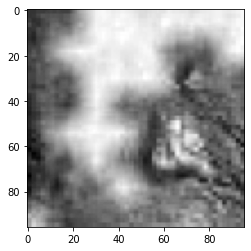

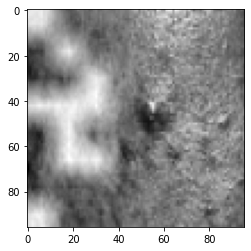

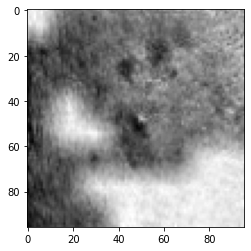

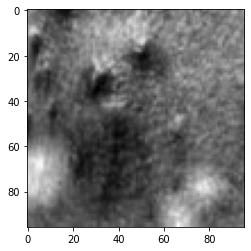

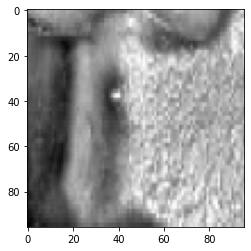

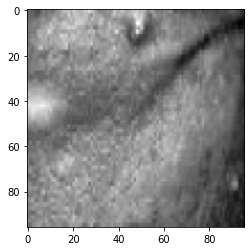

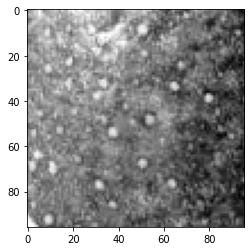

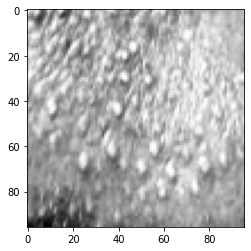

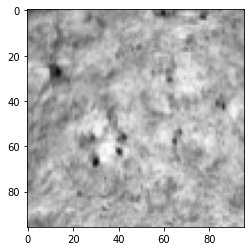

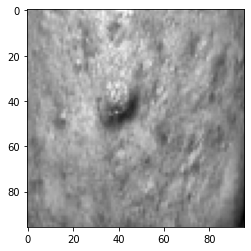

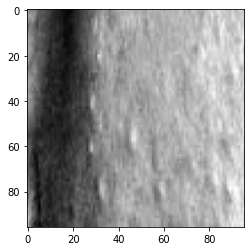

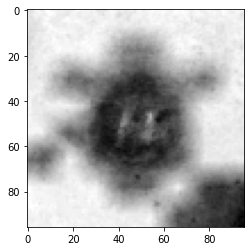

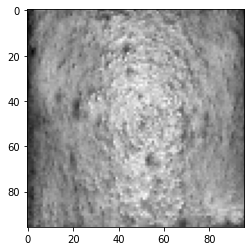

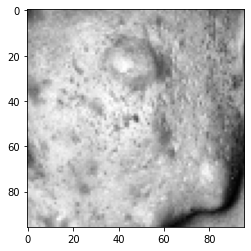

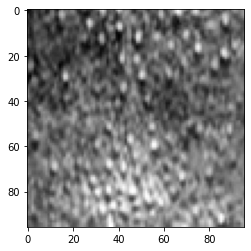

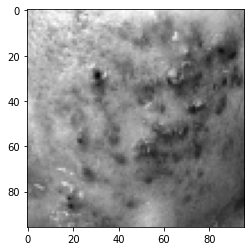

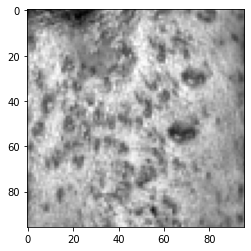

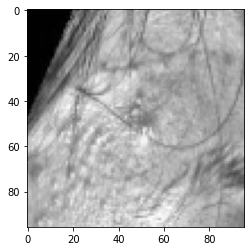

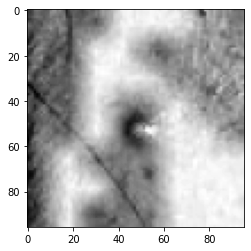

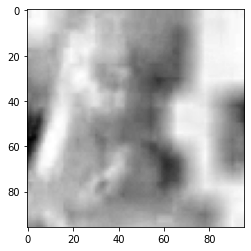

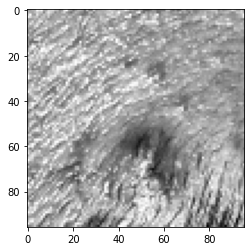

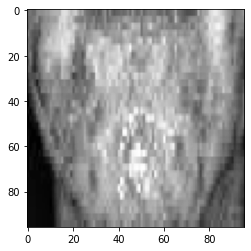

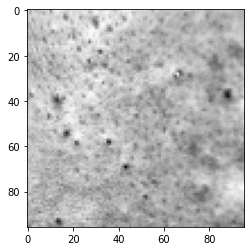

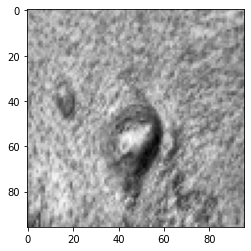

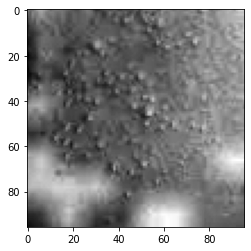

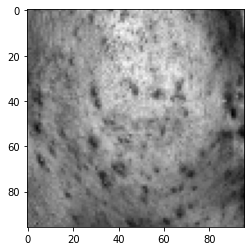

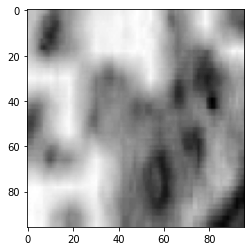

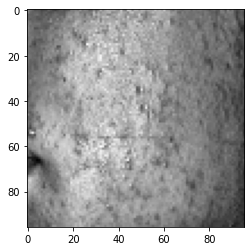

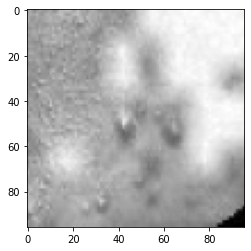

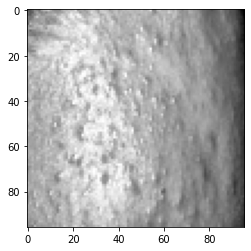

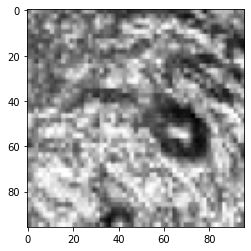

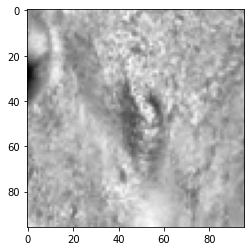

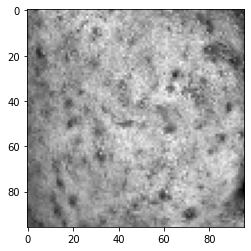

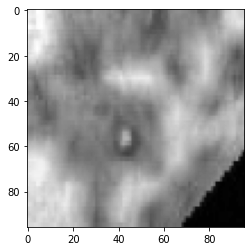

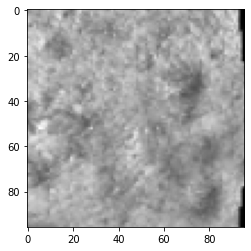

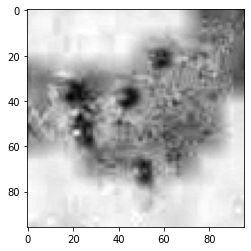

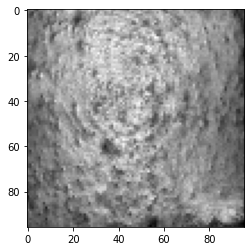

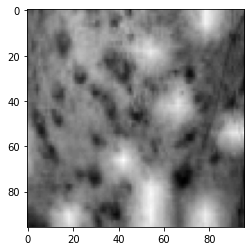

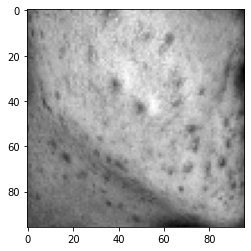

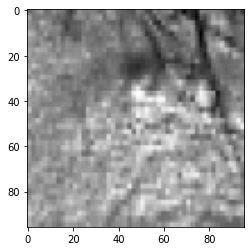

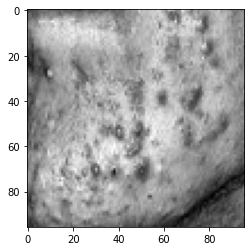

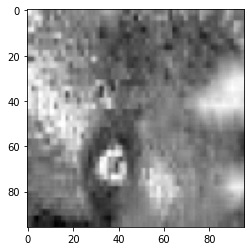

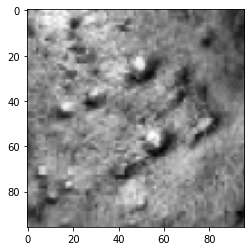

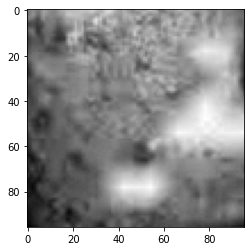

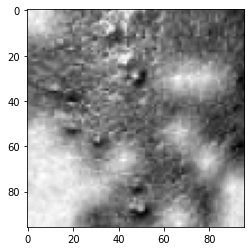

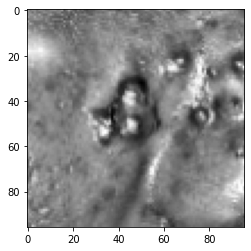

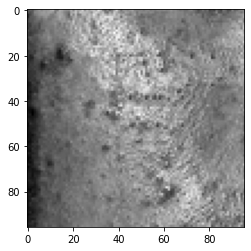

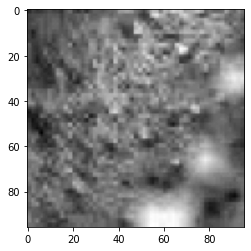

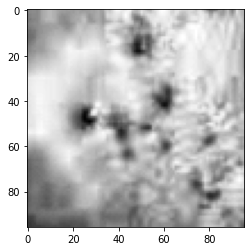

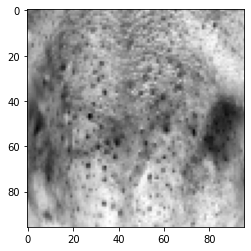

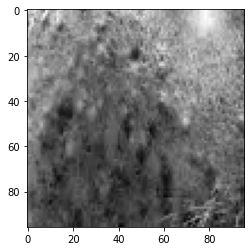

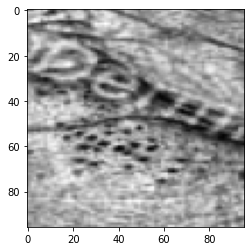

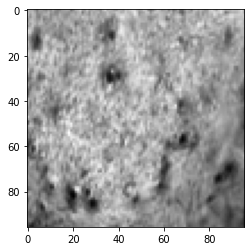

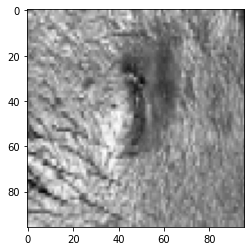

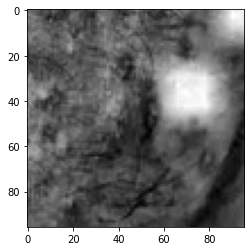

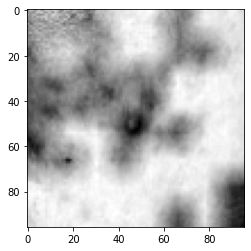

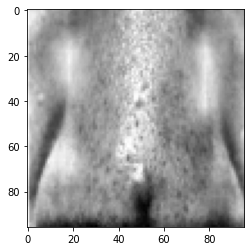

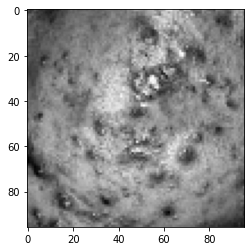

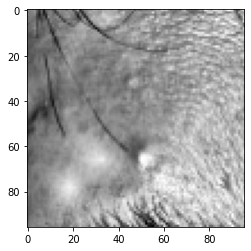

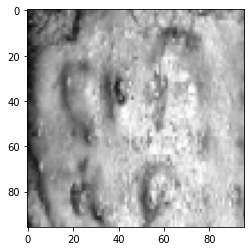

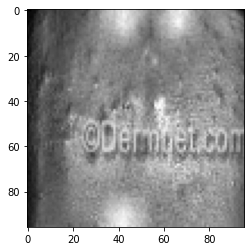

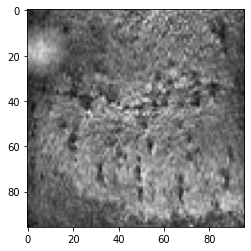

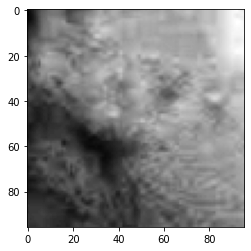

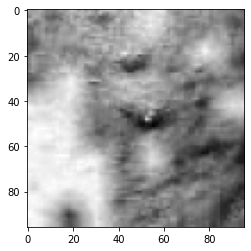

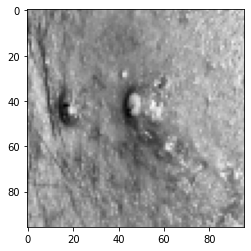

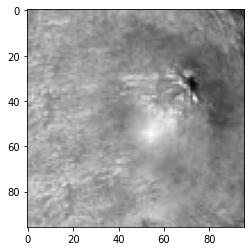

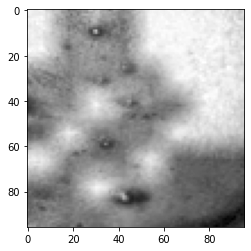

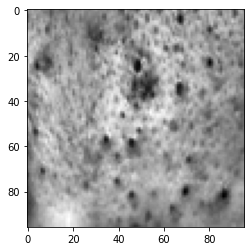

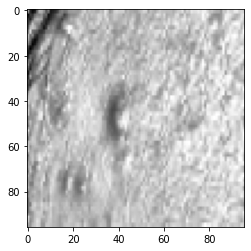

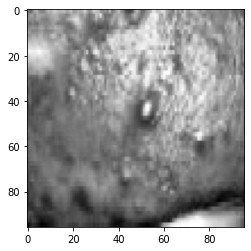

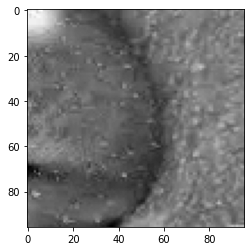

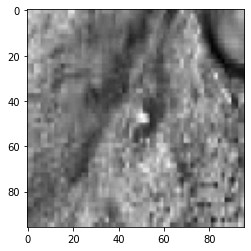

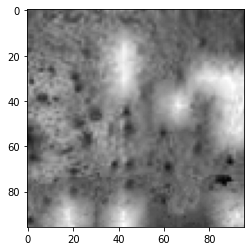

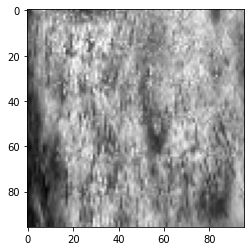

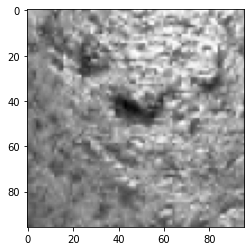

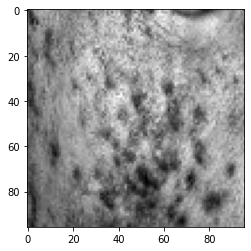

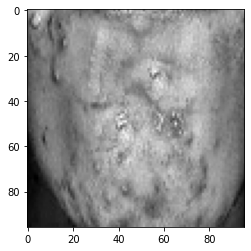

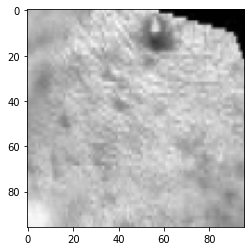

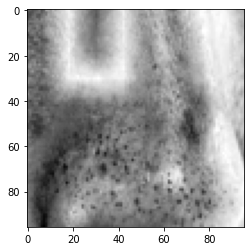

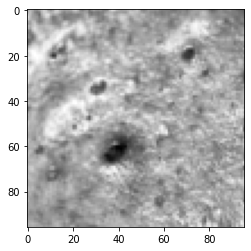

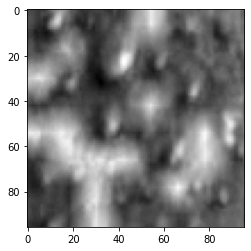

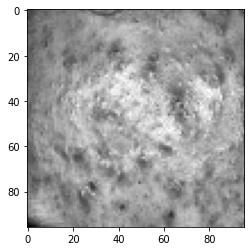

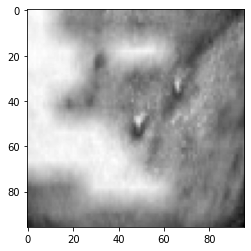

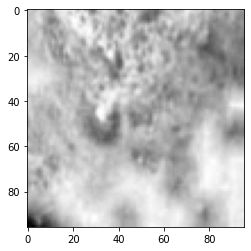

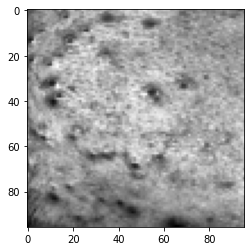

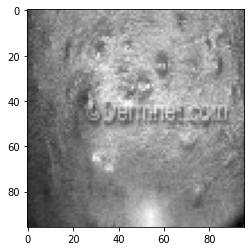

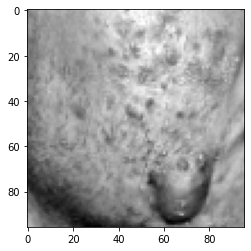

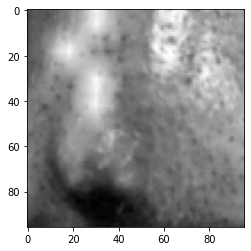

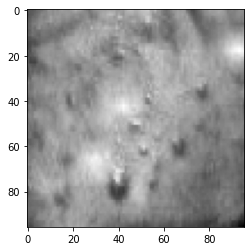

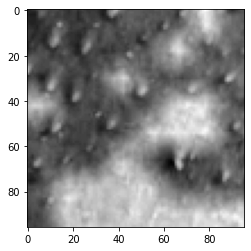

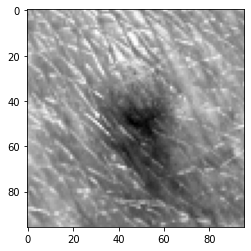

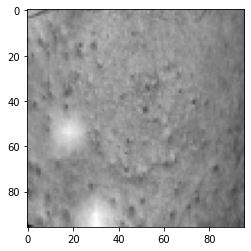

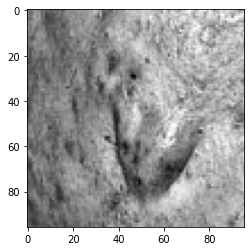

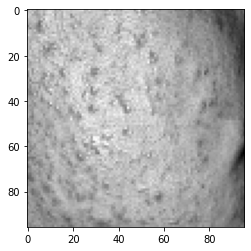

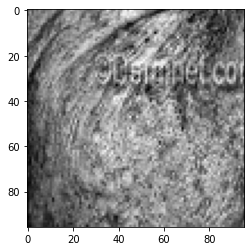

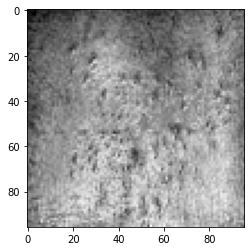

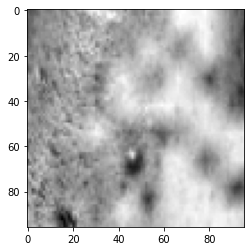

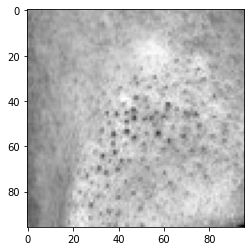

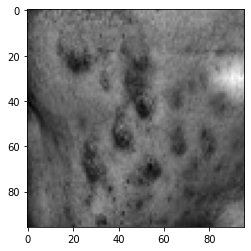

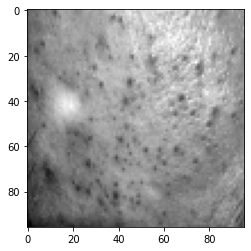

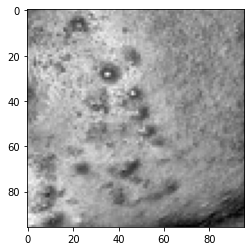

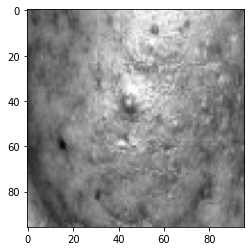

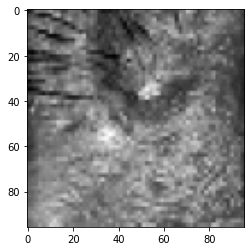

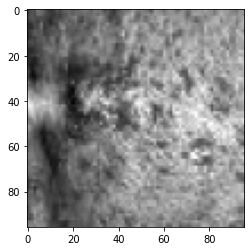

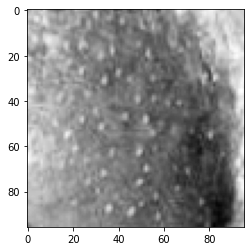

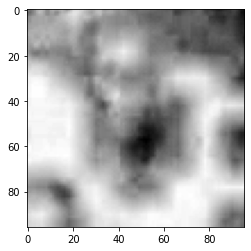

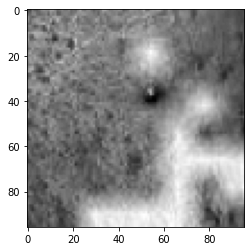

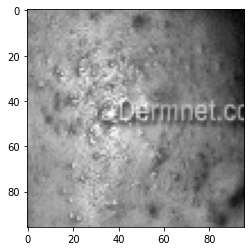

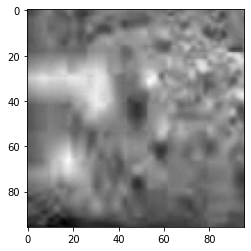

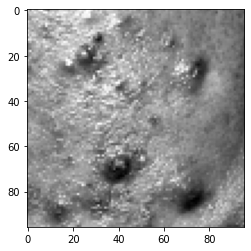

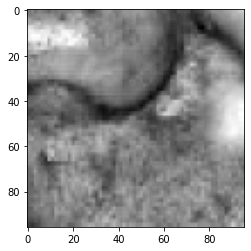

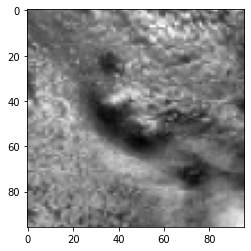

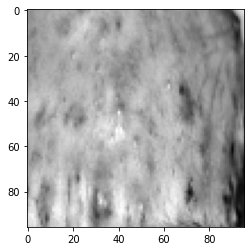

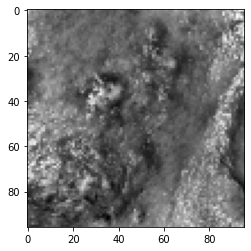

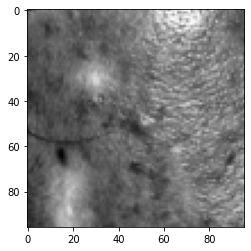

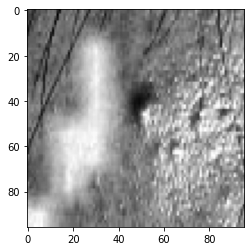

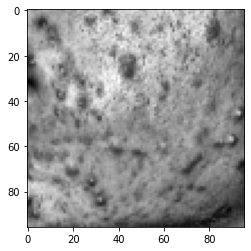

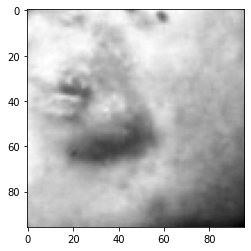

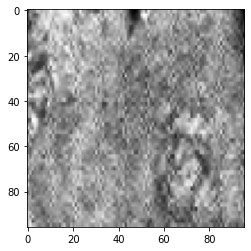

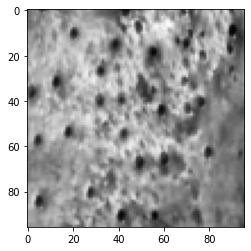

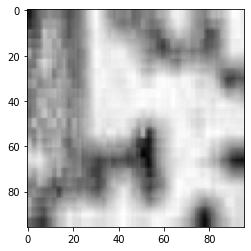

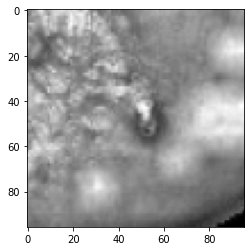

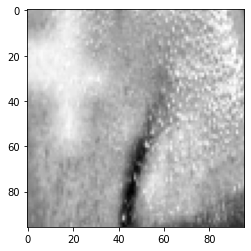

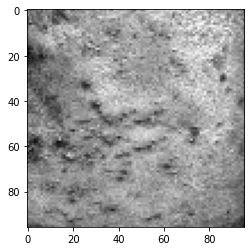

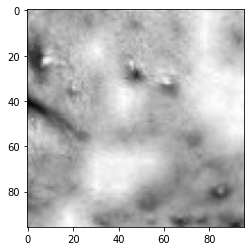

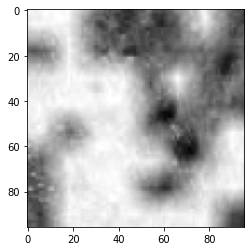

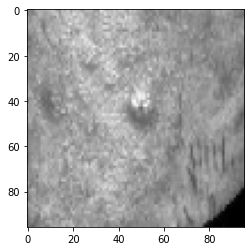

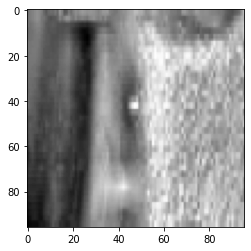

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


# print(im[0].shape)
for i in test_data:
  im = np.squeeze(i)
  plt.imshow(im, cmap='gray')
  plt.show()

In [ ]:
for layer in model_load.layers:
    if 'dense' in layer.name:
        weights, bias= layer.get_weights()
        # print(layer.name, filters)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  

        filter_cnt=1
        # for i in range(filters.shape[1]):
        #     #get the filters
        #     filt=filters[:, i]
        #     #plotting each of the channel, color image RGB channels
        #     for j in range(filters.shape[0]):
        #         ax= plt.subplot(filters.shape[1], filters.shape[0], filter_cnt  )
        #         ax.set_xticks([])
        #         ax.set_yticks([])
        #         plt.imshow(filt[:,j])
        #         filter_cnt+=1
        # plt.show()
print(filters[:3][:3])

[[0.774456   0.7213002  0.77224016 0.6971787  0.6728303  0.7817022 ]
 [0.39671758 0.7564732  0.40742677 0.72930837 0.6522502  0.75693387]
 [0.8686345  0.7989616  0.5074826  0.8051066  0.4541056  0.39691436]]


In [ ]:
print(y_pred)

print(test_target)


[1 3 0 5 2 5 1 5 2 2 1 3 5 0 3 2 3 3 2 0 3 0 5 0 4 1 0 1 1 3 4 0 2 3 4 3 4
 4 0 2 1 1 0 3 0 3 3 0 0 3 2 3 2 0 4 4 0 2 4 5 3 5 4 4 5 1]
[1 2 4 5 2 3 1 5 2 2 2 3 5 0 5 2 3 0 3 1 2 0 5 0 3 1 0 1 1 4 2 0 2 4 3 3 4
 4 0 2 2 5 0 3 4 2 3 4 0 2 2 3 1 0 4 4 0 2 4 2 5 5 0 2 5 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


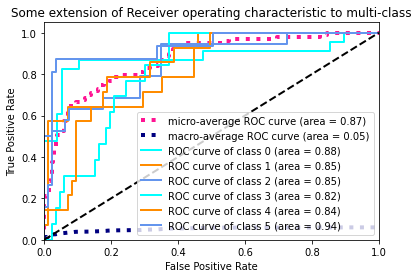

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(test_target[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_target.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(6)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(6):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-94), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
# plt.figure(2)
# plt.xlim(0, 0.2)
# plt.ylim(0.8, 1)
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue','darkblue','green','yellow'])
# for i, color in zip(range(6), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
model.save('drive/My Drive/best_model_33.h5')

In [ ]:
dat=np.load('drive/MyDrive/dataset/data.npy')
label=np.load('drive/MyDrive/dataset/label.npy')
target=np.load('drive/MyDrive/dataset/target.npy')
dataset = pd.DataFrame(data, column ='image')
dataset['label']=target
# data = np.random.shuffle(arr)

(640,)

Output streaming akan dipotong hingga 5000 baris terakhir.

Epoch 00055: val_accuracy did not improve from 0.31933
Epoch 56/425
30/30 [==============================] - 5s 172ms/step - loss: 0.4105 - accuracy: 0.3222 - val_loss: 0.4332 - val_accuracy: 0.2269

Epoch 00056: val_accuracy did not improve from 0.31933
Epoch 57/425
30/30 [==============================] - 5s 173ms/step - loss: 0.4142 - accuracy: 0.3431 - val_loss: 0.4307 - val_accuracy: 0.2773

Epoch 00057: val_accuracy did not improve from 0.31933
Epoch 58/425
30/30 [==============================] - 5s 176ms/step - loss: 0.4252 - accuracy: 0.2971 - val_loss: 0.4259 - val_accuracy: 0.2689

Epoch 00058: val_accuracy did not improve from 0.31933
Epoch 59/425
30/30 [==============================] - 5s 176ms/step - loss: 0.4092 - accuracy: 0.3285 - val_loss: 0.4298 - val_accuracy: 0.2185

Epoch 00059: val_accuracy did not improve from 0.31933
Epoch 60/425
30/30 [==============================] - 5s 175ms/step - loss: 0.4119 - 

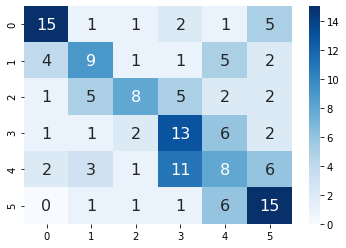

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Conv2D
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm as tq
from tqdm import tqdm, tqdm_notebook
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras import regularizers
cf_matrix = []
kfold = StratifiedKFold(n_splits=5, shuffle = True)


dat=np.load('drive/MyDrive/dataset/data.npy')
label=np.load('drive/MyDrive/dataset/label.npy')
target=np.load('drive/MyDrive/dataset/target.npy')

data = pd.read_csv('drive/MyDrive/dataset/file_name_uji601(106).csv', sep='\t',encoding='unicode_escape')

dataset = pd.DataFrame(list(map(np.ravel, dat)))
dataset['label']=label
from sklearn.utils import shuffle

dataset = shuffle(dataset)

xx = dataset.drop(columns=['label'])
xz = data.drop(columns=['label','file'],axis = 1)
xz = xz.drop("Unnamed: 0",axis=1)
y = dataset['label'].values
yz = data['label'].values
x = xx.to_numpy()
x1 = xz.to_numpy()

lab = np.concatenate((y,yz))

data_image = np.concatenate((x,x1))
data_images = data_image.reshape(len(data_image),96,96,1)
for i, (train, test) in enumerate(kfold.split(data_images, lab), start=1):
  label1=np_utils.to_categorical(lab)
  print('fold : ', i)
  x_train, x_test = data_images[train], data_images[test]
  y_train, y_test = label1[train], label1[test]
  datagen = ImageDataGenerator(rotation_range=90, shear_range=0.25, zoom_range=0.25, horizontal_flip=True, validation_split=0.2)
  training_generator = datagen.flow(x_train, y_train, batch_size =16, shuffle=True, subset='training',seed=42)
  validation_generator = datagen.flow(x_train, y_train,batch_size =16, shuffle=True, subset='validation', seed=42)

  input_shape=(96, 96, 1)
  def tf_data_generator(generator, input_shape):
      # num_class = generator.num_classes
      tf_generator = tf.data.Dataset.from_generator(
          lambda: generator,
          output_types=(tf.float32, tf.float32),
          output_shapes=([None
                          , input_shape[0]
                          , input_shape[1]
                          , input_shape[2]]
                        ,[None, 6])
      )
      return tf_generator
  train_data = tf_data_generator(training_generator, input_shape)
  # testing_data = tf_data_generator(test_generator, input_shape)
  val_data = tf_data_generator(validation_generator, input_shape)

  tf.keras.backend.clear_session()
  model = Sequential()
  model.add(Conv2D(8,(5,5), padding ="same", strides=(1,1), input_shape=(96, 96, 1), trainable=True, bias_regularizer= regularizers.l2(l2=0.001)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(16, (3,3), padding ="same", strides=(1,1), bias_regularizer= regularizers.l2(l2=0.001)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3,3), padding ="same", bias_regularizer= regularizers.l2(l2=0.001)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Conv2D(64, (3,3), padding ="same",bias_regularizer= regularizers.l2(l2=0.01)))
  # model.add(Activation('relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Conv2D(256, (5,5), padding ="same",bias_regularizer= regularizers.l2(l2=0.01)))
  # model.add(Activation('relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  # model.add(Dense(4096,activation="relu"))
  # model.add(Dropout(0.8))
  # model.add(Dense(2048,activation="relu"))
  # model.add(Dropout(0.5))
  model.add(Dense(64,activation="relu"))
  # model.add(Activation("relu"))
  model.add(Dropout(0.2))
  model.add(Dense(6, activation='softmax'))

  model.compile(loss='binary_crossentropy',
                # optimizer=optimizers.RMSprop(learning_rate=0.0001),
                optimizer= 'adam',
                metrics=['accuracy'])
  model.summary()
  es = EarlyStopping(monitor='val_accuracy', patience=5)
  cp = ModelCheckpoint('drive/MyDrive/best_model_fold2.h5', monitor='val_accuracy',verbose=1, save_best_only=True)
  history=model.fit(train_data,steps_per_epoch=len(training_generator), epochs=425, callbacks=[cp], validation_data=val_data,validation_steps=len(validation_generator),shuffle=True,verbose=1)

  score = model.evaluate(x_test,y_test, verbose=1)
  print('Test Loss:', score[0])
  print('Test accuracy:', score[1]) 
  model.save('drive/My Drive/dataset/modelcnn_fold_'+str(i)+'.h5')
  Y_pred = model.predict(x_test)
  y_pred = np.argmax(Y_pred, axis=1)

  target_names = ['blackheads','cystic','nodul','papules','pustules','whiteheads']
                                                
  print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

  cf_matrix.append(confusion_matrix(np.argmax(y_test,axis=1), y_pred, labels=[0,1,2,3,4,5]))
sns.heatmap(cf_matrix[0], cmap='Blues', annot=True, annot_kws={"size": 16}, fmt="d")

In [ ]:
len(x[test])

In [ ]:
  score = model.evaluate(x_test,y_test, verbose=1)
  print('Test Loss:', score[0])
  print('Test accuracy:', score[1])

              precision    recall  f1-score   support

     nodules       0.36      0.64      0.46        22
     papules       0.21      0.32      0.25        19
    pustules       0.32      0.30      0.31        20
      cystic       0.17      0.05      0.07        22
  blackheads       0.33      0.32      0.33        25
  whiteheads       0.55      0.30      0.39        20

    accuracy                           0.32       128
   macro avg       0.32      0.32      0.30       128
weighted avg       0.32      0.32      0.30       128



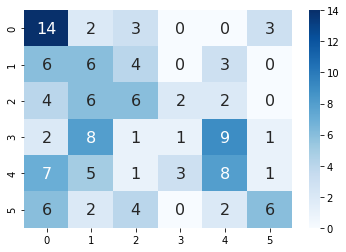

In [ ]:
  Y_pred = model.predict(x_test)
  y_pred = np.argmax(Y_pred, axis=1)
  target_names = ['nodules','papules','pustules','cystic','blackheads','whiteheads']
                                                
  print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

  cf_matrix = confusion_matrix(np.argmax(y_test,axis=1), y_pred, labels=[0,1,2,3,4,5])
  sns.heatmap(cf_matrix, cmap='Blues', annot=True, annot_kws={"size": 16}, fmt="d")

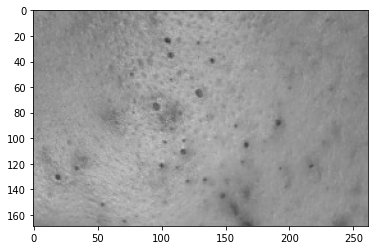

(169, 262)


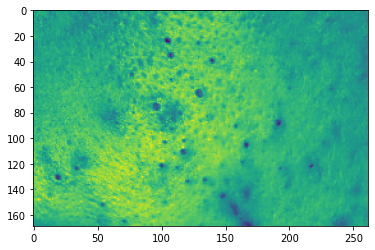

In [ ]:
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("drive/My Drive/dataset/train/blackheads/bh2.jpg") #--imread() helps in loading an image into jupyter including its pixel values
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
ww = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(ww)
print(ww.shape)

# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
# des_path = 'drive/My Drive/dataset/Data Citra Acne rev/Grey/'
# cv2.imwrite(file_dest,ww)  

In [ ]:
dat=np.load('drive/MyDrive/dataset/data.npy')
label=np.load('drive/MyDrive/dataset/label.npy')
target=np.load('drive/MyDrive/dataset/target.npy')

data = pd.read_csv('drive/MyDrive/dataset/file_name_uji601(106).csv', sep='\t',encoding='unicode_escape')

dataset = pd.DataFrame(list(map(np.ravel, dat)))
dataset['label']=label
from sklearn.utils import shuffle

dataset = shuffle(dataset)

xx = dataset.drop(columns=['label'])
xz = data.drop(columns=['label','file'],axis = 1)
xz = xz.drop("Unnamed: 0",axis=1)
y = dataset['label'].values
yz = data['label'].values
x = xx.to_numpy()
x1 = xz.to_numpy()

lab = np.concatenate((y,yz))

data_image = np.concatenate((x,x1))

In [ ]:
xz.head()

0         1         2  ...      9213      9214      9215
0  0.443137  0.325490  0.298039  ...  0.341176  0.286275  0.368627
1  0.494118  0.466667  0.486275  ...  0.227451  0.215686  0.196078
2  0.458824  0.682353  0.701961  ...  0.541176  0.200000  0.027451
3  0.415686  0.423529  0.458824  ...  0.431373  0.403922  0.403922
4  0.756863  0.639216  0.341176  ...  0.047059  0.047059  0.047059

[5 rows x 9216 columns]

In [ ]:
x = xx.to_numpy()
x1 = xz.to_numpy()

lab = np.concatenate((y,yz))

data_image = np.concatenate((x,x1))

In [ ]:
print(len(data_image), len(lab))

746 746


In [ ]:
print(y)

[2 3 1 0 2 1 0 2 5 3 5 4 1 4 2 0 4 2 1 4 2 4 1 2 0 3 2 4 5 5 3 5 0 1 2 2 5
 2 2 1 5 4 2 2 4 3 5 4 0 3 1 5 2 1 2 4 2 4 5 4 1 0 3 1 0 1 4 0 0 1 5 1 3 5
 1 1 4 4 5 3 2 1 3 1 0 3 3 2 3 5 3 5 3 4 4 5 2 1 1 4 1 2 4 3 0 5 5 2 2 4 5
 3 4 5 0 1 3 5 2 1 4 0 5 5 3 4 3 0 0 4 1 0 1 5 0 4 1 5 3 0 3 4 5 2 3 3 2 4
 3 4 1 2 3 4 0 2 4 2 3 1 4 5 2 4 4 1 0 5 5 0 3 3 5 1 5 4 4 1 3 1 2 0 4 1 4
 1 1 0 2 3 0 2 2 3 0 3 5 0 4 4 3 3 4 0 1 4 5 1 1 2 3 3 1 4 5 5 3 2 0 5 1 1
 3 1 0 0 0 0 4 3 2 3 1 4 3 0 2 0 0 1 4 5 2 0 3 0 2 5 3 2 5 2 0 1 1 2 0 3 1
 4 4 0 4 4 4 4 5 3 5 0 5 5 1 2 4 0 0 2 4 1 4 3 3 3 0 1 1 3 3 4 3 4 2 5 4 5
 0 0 4 4 4 1 2 0 0 0 3 0 2 0 0 3 2 3 5 1 5 3 4 4 2 5 1 2 4 4 3 2 0 1 3 4 1
 4 1 5 5 1 2 4 3 2 3 2 4 4 4 5 0 5 3 1 0 3 0 2 3 0 2 1 3 5 3 0 0 5 2 5 0 3
 0 1 5 5 0 0 1 2 3 5 5 4 1 4 5 0 0 0 4 4 5 2 3 1 2 3 5 4 3 1 4 3 3 2 1 1 1
 5 0 4 5 0 4 0 4 4 0 2 2 3 3 2 5 2 4 5 4 1 4 4 5 1 4 5 5 5 3 4 0 3 5 0 2 2
 2 5 0 2 4 4 2 3 5 1 3 0 4 3 4 5 3 2 2 1 2 2 4 3 5 0 1 5 1 0 1 4 5 4 0 4 2
 4 0 4 4 3 4 5 4 4 3 2 4 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        416       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

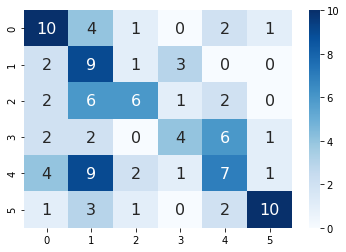

In [24]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Conv2D
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm as tq
from tqdm import tqdm, tqdm_notebook
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras import regularizers
cf_matrix = []
kfold = StratifiedKFold(n_splits=5, shuffle = True)


dat=np.load('drive/MyDrive/dataset/data.npy')
label=np.load('drive/MyDrive/dataset/label.npy')
target=np.load('drive/MyDrive/dataset/target.npy')

data = pd.read_csv('drive/MyDrive/dataset/file_name_uji601(106).csv', sep='\t',encoding='unicode_escape')

dataset = pd.DataFrame(list(map(np.ravel, dat)))
dataset['label']=label
from sklearn.utils import shuffle

dataset = shuffle(dataset)

xx = dataset.drop(columns=['label'])
xz = data.drop(columns=['label','file'],axis = 1)
xz = xz.drop("Unnamed: 0",axis=1)
y = dataset['label'].values
yz = data['label'].values
x = xx.to_numpy()
x1 = xz.to_numpy()

# lab = np.concatenate((y,yz))

# data_image = np.concatenate((x,x1))
x = x.reshape(len(x),96,96,1)
x_test = x1.reshape(len(x1),96,96,1)


# for i, (train, test) in enumerate(kfold.split(data_images, lab), start=1):
label1=np_utils.to_categorical(y)
label2=np_utils.to_categorical(yz)

#   print('fold : ', i)
#   x_train, x_test = data_images[train], data_images[test]
#   y_train, y_test = label1[train], label1[test]
datagen = ImageDataGenerator(rotation_range=45, shear_range=0.50, zoom_range=0.50, validation_split=0.1)
training_generator = datagen.flow(x, label1, batch_size =32, shuffle=True, subset='training', seed=40)
validation_generator = datagen.flow(x, label1,batch_size =32,shuffle=True, subset='validation', seed=40)

input_shape=(96, 96, 1)
def tf_data_generator(generator, input_shape):
    # num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                      ,[None, 6])
    )
    return tf_generator
train_data = tf_data_generator(training_generator, input_shape)
# testing_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(validation_generator, input_shape)

tf.keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(16,(5,5), padding ="same", strides=(1,1), input_shape=(96, 96, 1), trainable=True, bias_regularizer= regularizers.l2(l2=0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3), padding ="same", strides=(1,1), bias_regularizer= regularizers.l2(l2=0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), padding ="same", bias_regularizer= regularizers.l2(l2=0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3,3), padding ="same",bias_regularizer= regularizers.l2(l2=0.01)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(256, (5,5), padding ="same",bias_regularizer= regularizers.l2(l2=0.01)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# model.add(Dense(4096,activation="relu"))
# model.add(Dropout(0.8))
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
# model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss='binary_crossentropy',
              # optimizer=optimizers.RMSprop(learning_rate=0.001),
              optimizer= 'adam',
              metrics=['accuracy'])
model.summary()
es = EarlyStopping(monitor='val_accuracy', patience=10)
cp = ModelCheckpoint('drive/MyDrive/best_model_coba1.h5', monitor='val_accuracy',verbose=1, save_best_only=True)
history=model.fit(train_data,steps_per_epoch=len(training_generator), epochs=500, callbacks=[cp], validation_data=val_data,validation_steps=len(validation_generator),shuffle=True,verbose=1)

score = model.evaluate(x_test,label2, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]) 
model.save('drive/My Drive/dataset/modelcnn_coba12.h5')
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

target_names = ['blackheads','cystic','nodul','papules','pustules','whiteheads']
                                              
print(classification_report(np.argmax(label2,axis=1), y_pred,target_names=target_names))

cf_matrix.append(confusion_matrix(np.argmax(label2,axis=1), y_pred, labels=[0,1,2,3,4,5]))
sns.heatmap(cf_matrix[0], cmap='Blues', annot=True, annot_kws={"size": 16}, fmt="d")

              precision    recall  f1-score   support

  blackheads       0.78      1.00      0.88        18
      cystic       0.56      0.67      0.61        15
       nodul       0.71      0.71      0.71        17
     papules       0.80      0.53      0.64        15
    pustules       0.59      0.42      0.49        24
  whiteheads       0.76      0.94      0.84        17

    accuracy                           0.70       106
   macro avg       0.70      0.71      0.69       106
weighted avg       0.69      0.70      0.68       106



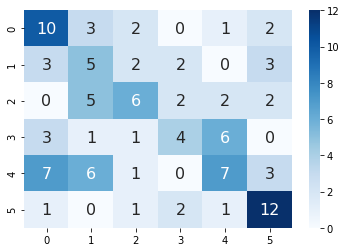

In [18]:
Y_pred = model_load.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

target_names = ['blackheads','cystic','nodul','papules','pustules','whiteheads']
                                              
print(classification_report(np.argmax(label2,axis=1), y_pred,target_names=target_names))

cf_matrix.append(confusion_matrix(np.argmax(label2,axis=1), y_pred, labels=[0,1,2,3,4,5]))
sns.heatmap(cf_matrix[0], cmap='Blues', annot=True, annot_kws={"size": 16}, fmt="d")

In [6]:
model.save('drive/My Drive/dataset/modelcnn_coba1.h5')

In [17]:
from tensorflow.keras.models import load_model
model_load = load_model('drive/MyDrive/best_model_fold2.h5')